# A5 - Analyzing Selected Repositories Code and Data
This notebooks analyzes code and data features from repositories that had Python or Jupyter Notebook as a Primary Language. We will analyze:

Python Files
 - Number of Lines per Python Files

Jupyter Notebooks
 - Number of Cells per Notebooks
 - Number of Lines per Cells
 - Cell Types Distribution

Data Files
 - Function AST Types
 - Most Common Data Types
 - Inputs
 - Outputs

In [146]:
import pandas as pd
from matplotlib import pyplot as plt
from src.db.database import connect

## Python Files
### Number of Lines from Python Files

In [147]:
with connect() as session:
    python_files = pd.read_sql_table("python_files", session.connection())
    print('Total of Python Files:', len(python_files))

Total of Python Files: 187


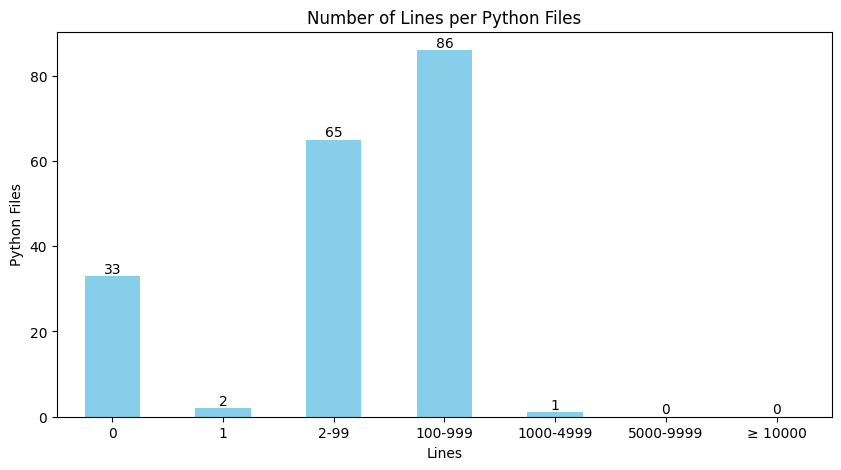

In [148]:
fig1, ax1 = plt.subplots( figsize=(10,5))
total_lines = python_files.total_lines\
    .value_counts(dropna=False, bins = [-1, 0, 1, 99, 999, 4999, 9999, 100000])\
    .sort_index().to_frame("Python Files")


total_lines.plot.bar(title='Number of Lines per Python Files', color='skyblue', ax=ax1,
                   xlabel='Lines', ylabel='Python Files').get_legend().remove()
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['0', '1', '2-99', '100-999', '1000-4999', '5000-9999','≥ 10000'], rotation=0)
ax1.bar_label(ax1.containers[0], label_type='edge');

## Jupyter Notebooks
### Number of Cells per Notebooks

In [149]:
with connect() as session:
    notebooks = pd.read_sql_table("notebooks", session.connection())
    print('Total of Notebooks:', len(notebooks))

Total of Notebooks: 308


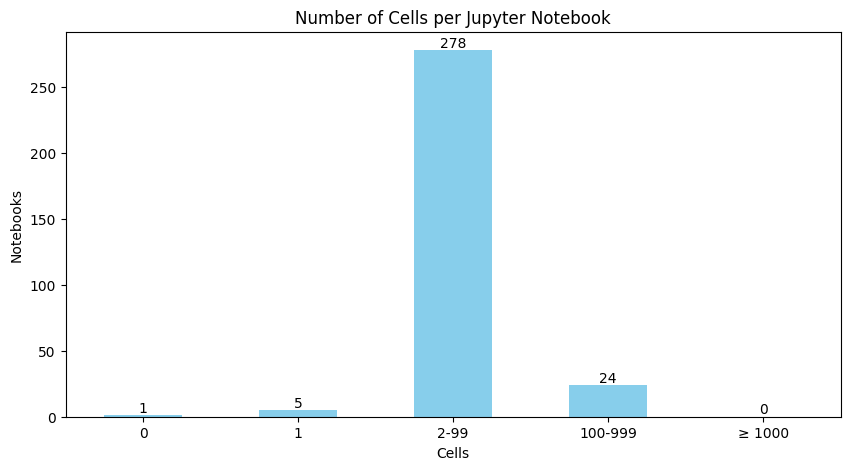

In [150]:
fig2, ax2 = plt.subplots( figsize=(10,5))
total_cells = notebooks.total_cells\
    .value_counts(dropna=False, bins = [-1, 0, 1, 99, 999, 100000])\
    .sort_index().to_frame("Notebooks")


total_cells.plot.bar(title='Number of Cells per Jupyter Notebook', color='skyblue', ax=ax2,
                   xlabel='Cells', ylabel='Notebooks').get_legend().remove()
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['0', '1', '2-99', '100-999','≥ 1000'], rotation=0)
ax2.bar_label(ax2.containers[0], label_type='edge');

### Number of Lines per Cells

In [151]:
with connect() as session:
    cells = pd.read_sql_table("cells", session.connection())
    print('Total of Cells:', len(cells))

Total of Cells: 12989


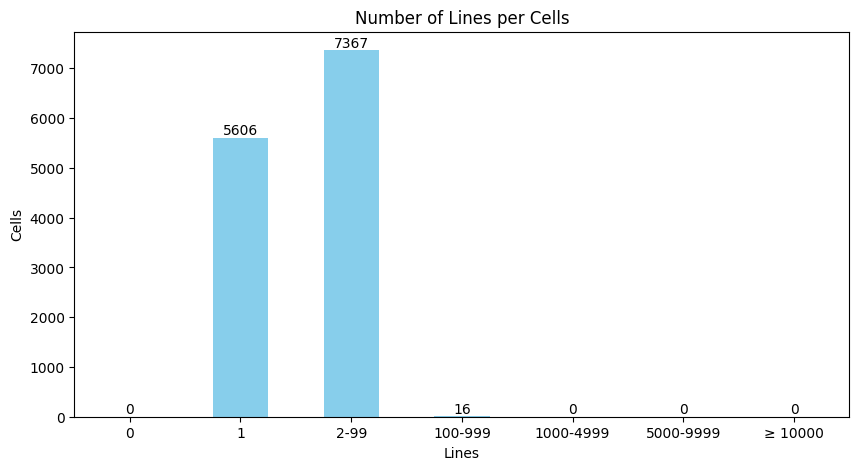

In [152]:
fig3, ax3 = plt.subplots( figsize=(10,5))
lines = cells.lines\
    .value_counts(dropna=False, bins = [-1, 0, 1, 99, 999, 4999, 9999, 100000])\
    .sort_index().to_frame("Cells")


lines.plot.bar(title='Number of Lines per Cells', color='skyblue', ax=ax3,
                   xlabel='Lines', ylabel='Cells').get_legend().remove()
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['0', '1', '2-99', '100-999', '1000-4999', '5000-9999','≥ 10000'], rotation=0)
ax3.bar_label(ax3.containers[0], label_type='edge');

### Distribution of Cell Types

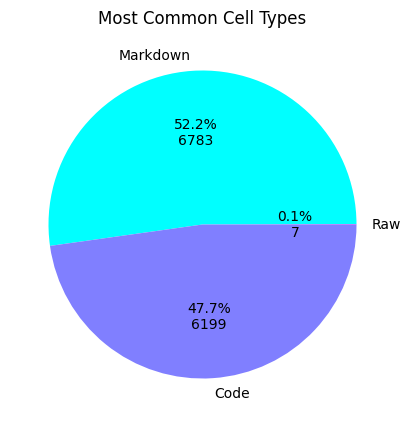

In [153]:
types = cells.cell_type.value_counts().rename_axis("Types").to_frame("Cells")
fig4, ax4 = plt.subplots(figsize=(5, 5))
types.plot \
    .pie(ax=ax4, y="Cells", title="Most Common Cell Types",
         labels=["Markdown", "Code", "Raw"], ylabel='', cmap="cool",
         autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                  .format(prct_value, (types["Cells"].sum()) * prct_value / 100))) \
    .get_legend().remove()

## Data Files

In [154]:
with connect() as session:
    data_ios = pd.read_sql_table("data_ios", session.connection())
    print('Total of Data Files:', len(data_ios))

Total of Data Files: 271


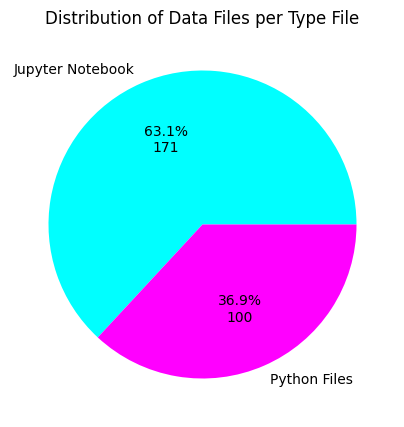

In [155]:
data_files = data_ios.type.value_counts().rename_axis("Types").to_frame("Data Files")
fig5, ax5 = plt.subplots(figsize=(5, 5))
data_files.plot \
    .pie(ax=ax5, y="Data Files", title="Distribution of Data Files per Type File",
         labels=[ "Jupyter Notebook", "Python Files"], ylabel='', cmap="cool",
         autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                  .format(prct_value, (data_files["Data Files"].sum()) * prct_value / 100))) \
    .get_legend().remove()

### Function AST Types
When representing python function calls as Abstract Syntax Trees (ASTs) they can either be Names or Attributes.

Names just call the function with its arguments `` read_txt("data.txt")``
where ``read_txt`` is the function Name and ``"data.txt"`` its argument.


Attributes on the other hand have to call the function ``pd.read_csv("data.csv")``
where pd is the caller (the module where the function is being called from),
``read_csv`` the function name and ``"data.csv"`` its arguments.

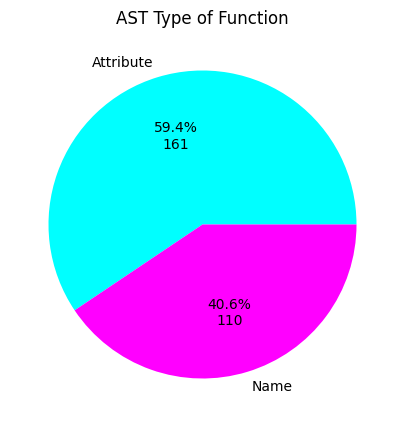

In [156]:
function_types = data_ios.function_type.value_counts().rename_axis("Types").to_frame("Function Types")
fig6, ax6 = plt.subplots(figsize=(5, 5))
function_types.plot \
    .pie(ax=ax6, y="Function Types", title="AST Type of Function",
         labels=[ "Attribute", "Name"], ylabel='', cmap="cool",
         autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                  .format(prct_value, (function_types["Function Types"].sum()) * prct_value / 100))) \
    .get_legend().remove()

#### Function caller modules and names

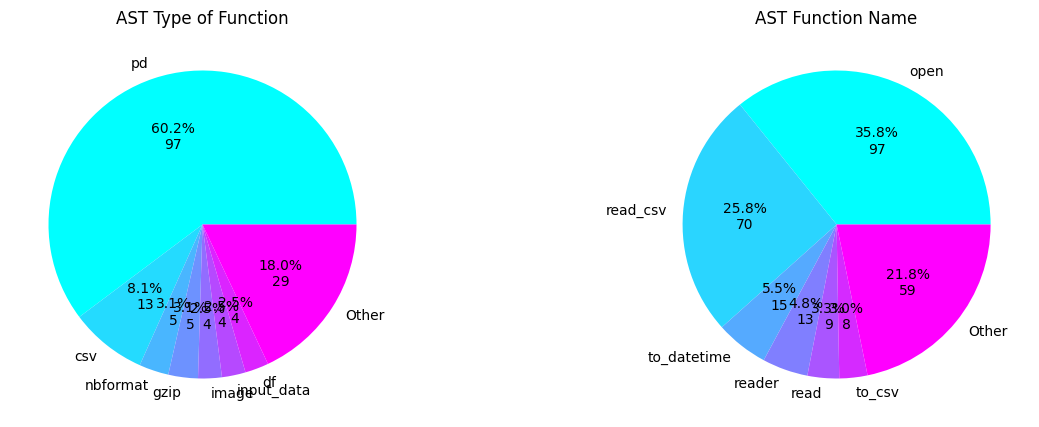

In [157]:
fig7, ax7 = plt.subplots(figsize=(15, 5), ncols=2)
callers = data_ios.caller.dropna().value_counts().rename_axis("Caller").to_frame("Count")

other_value = callers[callers["Count"] < 4]["Count"].sum()
new_callers = callers[callers["Count"]>=4].copy()
new_callers.loc["Other"] = [other_value]

new_callers.plot.pie(ax=ax7[0], y="Count", title="AST Type of Function", ylabel='', cmap="cool",

         autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                  .format(prct_value, (new_callers["Count"].sum()) * prct_value / 100))) \
    .get_legend().remove()

names = data_ios.function_name.dropna().value_counts().rename_axis("Caller").to_frame("Count")
other_value = names[names["Count"] < 8]["Count"].sum()
new_names = names[names["Count"]>=8].copy()
new_names.loc["Other"] = [other_value]
new_names.plot.pie(ax=ax7[1], y="Count", title="AST Function Name", ylabel='', cmap="cool",
         autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                  .format(prct_value, (names["Count"].sum()) * prct_value / 100))) \
    .get_legend().remove();

### Arguments

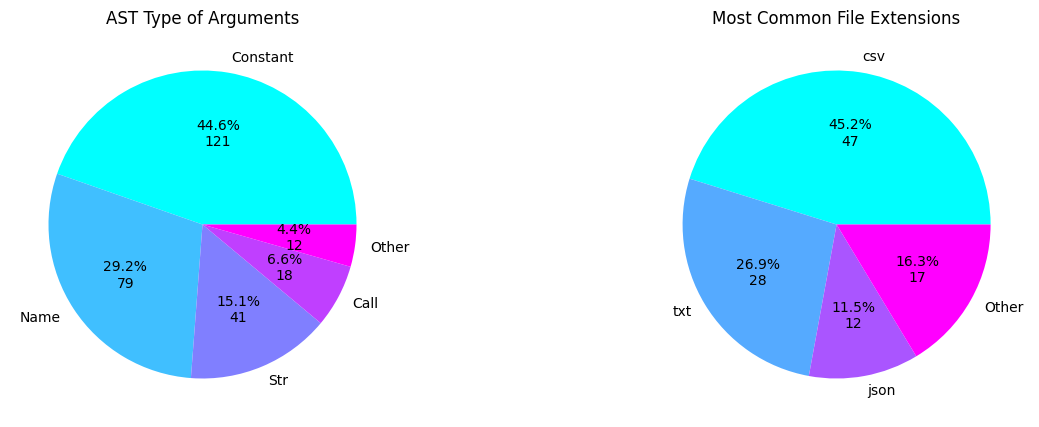

In [158]:
fig8, ax8 = plt.subplots(figsize=(15, 5), ncols=2)


source_types = data_ios.source_type.value_counts().rename_axis("Types").to_frame("Source Types")
other_value = source_types[source_types["Source Types"] < 10]["Source Types"].sum()
new_source_types = source_types[source_types["Source Types"]>=10].copy()
new_source_types.loc["Other"] = [other_value]

new_source_types.plot \
    .pie(ax=ax8[0], y="Source Types", title="AST Type of Arguments",
 ylabel='', cmap="cool",
         autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                  .format(prct_value, (source_types["Source Types"].sum()) * prct_value / 100))) \
    .get_legend().remove()

extensions = data_ios.infered_file_extension.dropna().value_counts().rename_axis("Extension").to_frame("Count")
other_value = extensions[extensions["Count"] < 10]["Count"].sum()
new_extensions = extensions[extensions["Count"]>=10].copy()
new_extensions.loc["Other"] = [other_value]
new_extensions.plot.pie(ax=ax8[1], y="Count", title="Most Common File Extensions",
                    ylabel='', cmap="cool",
                     autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                              .format(prct_value, (new_extensions["Count"].sum()) * prct_value / 100)))\
                    .get_legend().remove();

### Infered Types (Inputs / Outputs)

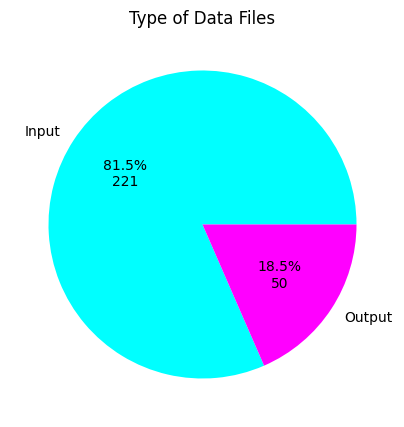

In [159]:
data_files = data_ios.infered_type.value_counts().rename_axis("Types").to_frame("Data Files")
fig9, ax9 = plt.subplots(figsize=(5, 5))
data_files.plot \
    .pie(ax=ax9, y="Data Files", title="Type of Data Files",
         labels=[ "Input", "Output"], ylabel='', cmap="cool",
         autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                  .format(prct_value, (data_files["Data Files"].sum()) * prct_value / 100))) \
    .get_legend().remove()

### Inputs
From functions considered data inputs, specifically, we have:

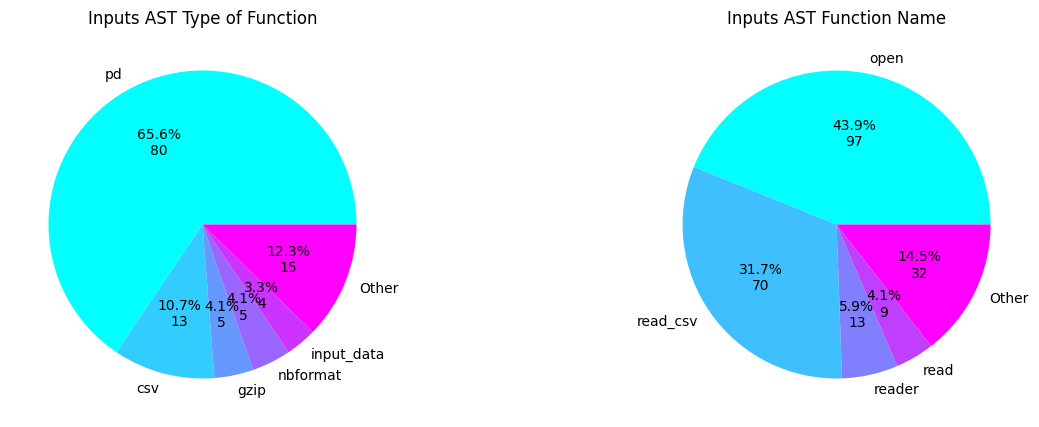

In [160]:
inputs = data_ios[data_ios.infered_type == 'input']
fig10, ax10 = plt.subplots(figsize=(15, 5), ncols=2)
callers = inputs.caller.dropna().value_counts().rename_axis("Caller").to_frame("Count")

other_value = callers[callers["Count"] < 4]["Count"].sum()
new_callers = callers[callers["Count"]>=4].copy()
new_callers.loc["Other"] = [other_value]

new_callers.plot.pie(ax=ax10[0], y="Count", title="Inputs AST Type of Function", ylabel='', cmap="cool",

         autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                  .format(prct_value, (new_callers["Count"].sum()) * prct_value / 100))) \
    .get_legend().remove()

names = inputs.function_name.dropna().value_counts().rename_axis("Caller").to_frame("Count")
other_value = names[names["Count"] < 8]["Count"].sum()
new_names = names[names["Count"]>=8].copy()
new_names.loc["Other"] = [other_value]
new_names.plot.pie(ax=ax10[1], y="Count", title="Inputs AST Function Name", ylabel='', cmap="cool",
         autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                  .format(prct_value, (names["Count"].sum()) * prct_value / 100))) \
    .get_legend().remove();

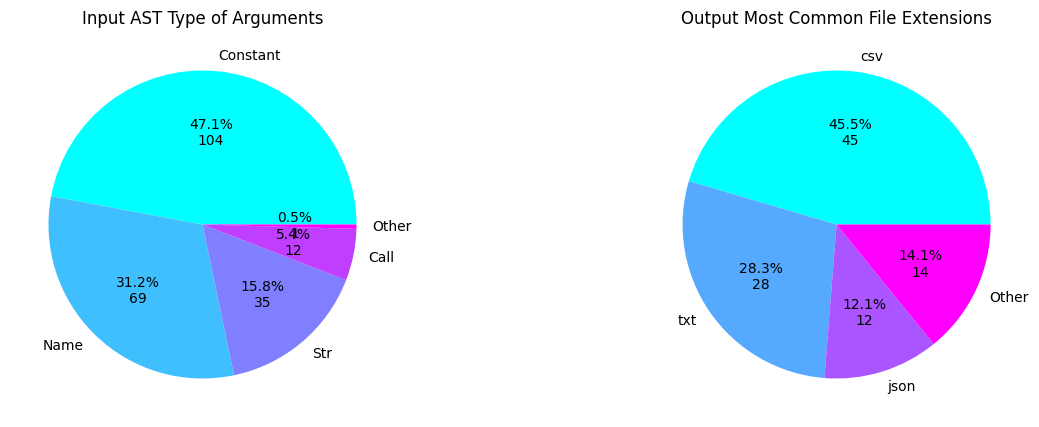

In [161]:
fig11, ax11 = plt.subplots(figsize=(15, 5), ncols=2)

source_types = inputs.source_type.value_counts().rename_axis("Types").to_frame("Source Types")
other_value = source_types[source_types["Source Types"] < 10]["Source Types"].sum()
new_source_types = source_types[source_types["Source Types"]>=10].copy()
new_source_types.loc["Other"] = [other_value]

new_source_types.plot \
    .pie(ax=ax11[0], y="Source Types", title="Input AST Type of Arguments",
 ylabel='', cmap="cool",
         autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                  .format(prct_value, (source_types["Source Types"].sum()) * prct_value / 100))) \
    .get_legend().remove()

extensions = inputs.infered_file_extension.dropna().value_counts().rename_axis("Extension").to_frame("Count")
other_value = extensions[extensions["Count"] < 10]["Count"].sum()
new_extensions = extensions[extensions["Count"]>=10].copy()
new_extensions.loc["Other"] = [other_value]
new_extensions.plot.pie(ax=ax11[1], y="Count", title="Output Most Common File Extensions",
                    ylabel='', cmap="cool",
                     autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                              .format(prct_value, (new_extensions["Count"].sum()) * prct_value / 100)))\
                    .get_legend().remove();

### Outputs
From functions considered data outputs, specifically, we have:

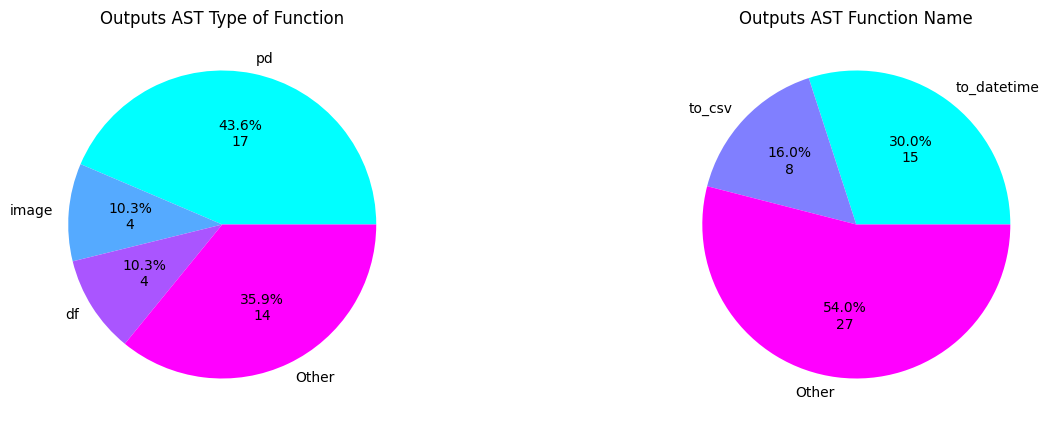

In [162]:
outputs = data_ios[data_ios.infered_type == 'output']
fig12, ax12 = plt.subplots(figsize=(15, 5), ncols=2)
callers = outputs.caller.dropna().value_counts().rename_axis("Caller").to_frame("Count")

other_value = callers[callers["Count"] < 4]["Count"].sum()
new_callers = callers[callers["Count"]>=4].copy()
new_callers.loc["Other"] = [other_value]

new_callers.plot.pie(ax=ax12[0], y="Count", title="Outputs AST Type of Function", ylabel='', cmap="cool",

         autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                  .format(prct_value, (new_callers["Count"].sum()) * prct_value / 100))) \
    .get_legend().remove()

names = outputs.function_name.dropna().value_counts().rename_axis("Caller").to_frame("Count")
other_value = names[names["Count"] < 8]["Count"].sum()
new_names = names[names["Count"]>=8].copy()
new_names.loc["Other"] = [other_value]
new_names.plot.pie(ax=ax12[1], y="Count", title="Outputs AST Function Name", ylabel='', cmap="cool",
         autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                  .format(prct_value, (names["Count"].sum()) * prct_value / 100))) \
    .get_legend().remove();

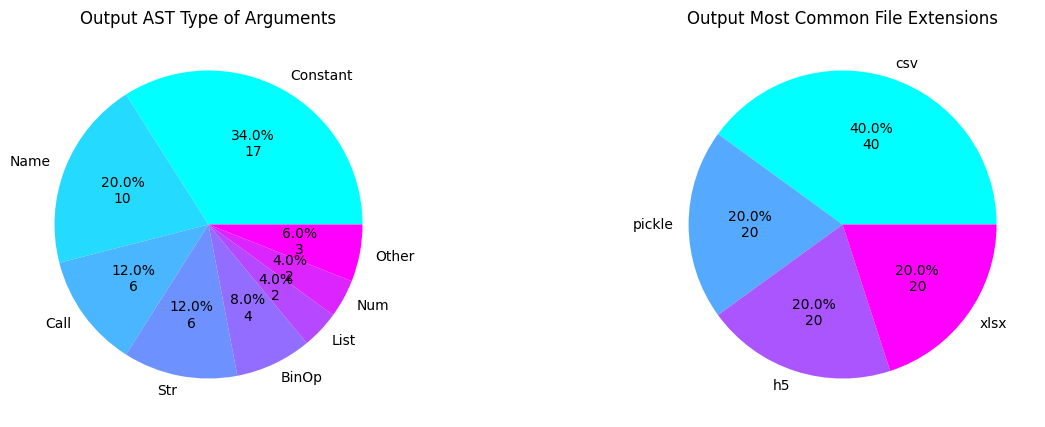

In [163]:
fig13, ax13 = plt.subplots(figsize=(15, 5), ncols=2)

source_types = outputs.source_type.value_counts().rename_axis("Types").to_frame("Source Types")
other_value = source_types[source_types["Source Types"] < 2]["Source Types"].sum()
new_source_types = source_types[source_types["Source Types"]>=2].copy()
new_source_types.loc["Other"] = [other_value]

new_source_types.plot \
    .pie(ax=ax13[0], y="Source Types", title="Output AST Type of Arguments",
 ylabel='', cmap="cool",
         autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                  .format(prct_value, (source_types["Source Types"].sum()) * prct_value / 100))) \
    .get_legend().remove()

extensions = outputs.infered_file_extension.dropna().value_counts().rename_axis("Extension").to_frame("Count")
# other_value = extensions[extensions["Count"] < 1]["Count"].sum()
# new_extensions = extensions[extensions["Count"]>=1].copy()
# new_extensions.loc["Other"] = [other_value]
extensions.plot.pie(ax=ax13[1], y="Count", title="Output Most Common File Extensions",
                    ylabel='', cmap="cool",
                     autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                              .format(prct_value, (new_extensions["Count"].sum()) * prct_value / 100)))\
                    .get_legend().remove();